<a href="https://colab.research.google.com/github/TerradasExatas/Controle_em_python/blob/main/controle_python_9_interpretando_o_LGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 7.6 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=e0a18296903b8ab28e8aaa8f8e36e1288ef383f368262ce4c72fe1d4482f2d5e
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


 G_s =  
s^2 - 3 s + 2
-------------
s^2 + 4 s + 8

K máximo de estabilidade=  1.3333333333333333
k= 0.67 P= [-0.6+2.28910463j -0.6-2.28910463j]
k= 1.33 P= [-0.+2.13808994j  0.-2.13808994j]
k= 1.47 P= [0.08108108+2.1037724j 0.08108108-2.1037724j]
k= 1.73 P= [0.2195122+2.0364028j 0.2195122-2.0364028j]


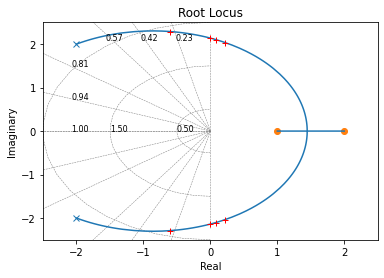

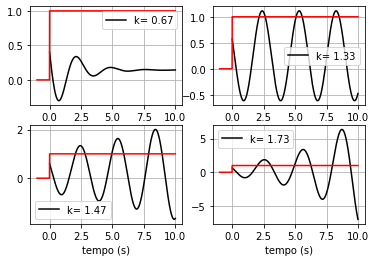

In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

#função de transferência Malha aberta
s = ctl.TransferFunction.s
G_s =((s-1)*(s-2))/(s**2+4*s+8)
#G_s =(s+1)/(s**3+2*s**2+4*s+16)
print(' G_s = ',G_s)

#LGR
plt.figure(1) #fixa o LGR na figura 1
ctl.root_locus(G_s);
plt.ylim([-2.5,2.5]);plt.xlim([-2.5,2.5])

#máximo K para estabilidade
out_st_magn=ctl.stability_margins(G_s)
Gain_margin=out_st_magn[0]
print('K máximo de estabilidade= ',Gain_margin)

#resposta ao degrau
Tsim=10;
quais_T=np.linspace(-1.,Tsim,1000)
#calcula um degrau unitário
degrau=np.ones_like(quais_T)
degrau[quais_T<0]=0;

# calcula os polos e a resposta para 4 valores de K
quais_K=Gain_margin*np.array([0.5,1.0,1.1,1.3])
for qK in range(0,len(quais_K)):
  C_s=quais_K[qK]
  #Funcao de transf MF
  G1_s=ctl.feedback(ctl.series(C_s, G_s), 1, sign=-1)
  plt.figure(1) #volta para a figura 1 para marcar o polo
  plt.plot(np.real(ctl.pole(G1_s)),np.imag(ctl.pole(G1_s)),'r+')

  T_mf, yout_mf = ctl.step_response(G1_s, quais_T[quais_T>0])

  #plota as 4 respostas ao degrau
  plt.figure(2)
  plt.subplot(2,2,qK+1)
  plt.plot(T_mf,yout_mf,'k-')
  plt.plot(quais_T,degrau,'r-')
  plt.xlabel('tempo (s)')
  print("k= "+str(round(quais_K[qK],2))+" P= " +str(ctl.pole(G1_s)))
  plt.legend(["k= "+str(round(quais_K[qK],2))])
  plt.grid();


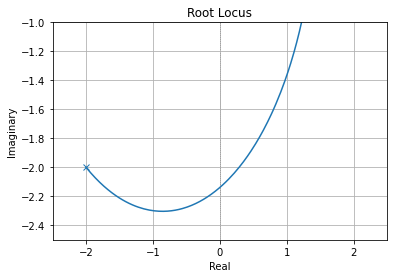

In [6]:
#fazendo zoom no LGR
rlist, klist = ctl.rlocus(G_s,kvect=quais_K,print_gain=True,grid=False,);
#plt.show()
plt.ylim([-2.5,-1]);plt.xlim([-2.5,2.5])
plt.grid();